## Automatic Review Analyzer

The goal of this project is to design a classifier to use for sentiment analysis of product reviews. Our training set consists of reviews written by Amazon customers for various food products. The reviews, originally given on a 5 point scale, have been adjusted to a +1 or -1 scale, representing a positive or negative review, respectively.

Below are two example entries from our dataset. Each entry consists of the review and its label. The two reviews were written by different customers describing their experience with a sugar-free candy.

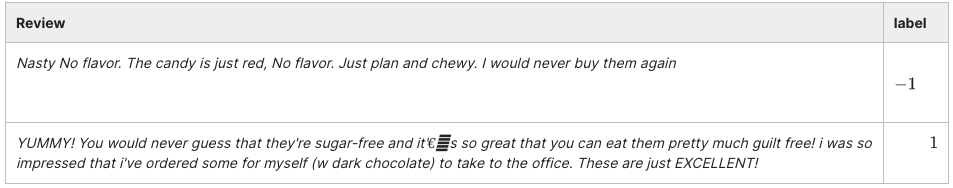

In order to automatically analyze reviews, you will need to complete the following tasks:

1) Implement and compare three types of linear classifiers: the perceptron algorithm, the average perceptron algorithm, and the Pegasos algorithm.

2) Use your classifiers on the food review dataset, using some simple text features.

3) Experiment with additional features and explore their impact on classifier performance.

First, implement the basic hinge loss calculation on a single data-point. Instead of the entire feature matrix, you are given one row, representing the feature vector of a single data sample, and its label of +1 or -1 representing the ground truth sentiment of the data sample.

In [ ]:
import numpy as np
import test_utils as T

def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        `feature_vector` - numpy array describing the given data point (X).
        `label` - float, the correct classification of the data
            point (y).
        `theta` - numpy array describing the linear classifier (weights).
        `theta_0` - float representing the offset parameter (bias).
    Returns:
        the hinge loss, as a float, associated with the given data point and
        parameters.
    """
    hinge_loss = max(0, 1 - label * (np.dot(theta, feature_vector) + theta_0))
    return hinge_loss


def test_hinge_loss_single():
    ex_name = "Hinge loss single"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if T.check_real(
            ex_name, hinge_loss_single,
            exp_res, feature_vector, label, theta, theta_0):
        return
    T.log(T.green("PASS"), ex_name, "")

test_hinge_loss_single()


Now it's time to implement the complete hinge loss for a full set of data. Your input will be a full feature matrix this time, and you will have a vector of corresponding labels. The mth row of the feature matrix corresponds to the mth element of the labels vector. This function should return the appropriate loss of the classifier on the given dataset.

In [ ]:
import numpy as np

def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the hinge loss for given classification parameters averaged over a
    given dataset

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point (X).
        `labels` - numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix (y).
        `theta` - numpy array describing the linear classifier (weights).
        `theta_0` - real valued number representing the offset parameter (bias).
    Returns:
        the hinge loss, as a float, associated with the given dataset and
        parameters.  This number should be the average hinge loss across all of
    """

    hinge_loss = 0
    m = len(feature_matrix) # number of data points
    for i in range(m):
        hinge_loss += max(0, 1 - labels[i] * (np.dot(theta, feature_matrix[i]) + theta_0))
    
    return hinge_loss / m


def test_hinge_loss():
    ex_name = "Hinge loss full"

    feature_vector = np.array([[1, 2], [1, 2]])
    label, theta, theta_0 = np.array([1, 1]), np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if T.check_real(
            ex_name, hinge_loss_full,
            exp_res, feature_vector, label, theta, theta_0):
        return

    T.log(T.green("PASS"), ex_name, "")

test_hinge_loss()

### Perceptron Algorithm

Implement the single step update for the perceptron algorithm (implemented with 0 - 1 loss).

$$
L(y, f(x)) = 1 \space\space if \space\space y \space != f(x) \space\space else \space 0
$$


**Note** In numerical computations, due to the limitations of floating-point precision, very small numbers close to zero might not be exactly zero. This can lead to unexpected results in comparisons. To mitigate this, you can define a small positive number, `epsilon = 1e-8`, and treat any number smaller than `epsilon` in absolute value as zero.

In [ ]:
import test_utils as T
# ln -s /Users/n03an/Documents/projects/AI/edx/MIT-MachineLearning-MicroMasters/test/utils.py test_utils.py 

def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Updates the classification parameters `theta` and `theta_0` via a single
    step of the perceptron algorithm.  Returns new parameters rather than
    modifying in-place.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.
    Returns a tuple containing two values:
        the updated feature-coefficient parameter `theta` as a numpy array
        the updated offset parameter `theta_0` as a floating point number
    """
    theta = current_theta
    theta_0 = current_theta_0

    if label * (np.dot(current_theta, feature_vector) + current_theta_0) <= 1e-7:
        theta += label * feature_vector
        theta_0 += label

    return (theta, theta_0)

def test_perceptron_single(name):
    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    exp_res = (np.array([0, 3]), -0.5)

    # response = perceptron_single_step_update(feature_vector, label, theta, theta_0)

    if T.check_tuple(
            name , perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    T.log(T.green("PASS"), name, "")

def test_perceptron_single_boundary(name):
    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1
    exp_res = (np.array([0, 3]), 0)
    if T.check_tuple(
            name , perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    T.log(T.green("PASS"), name, "")

test_perceptron_single("Perceptron single update")
test_perceptron_single_boundary("Perceptron single update (boundary case)")

In [ ]:
import test_utils as test
import utils as U

def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set: we do not stop early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns a tuple containing two values:
        the feature-coefficient parameter `theta` as a numpy array
            (found after T iterations through the feature matrix)
        the offset parameter `theta_0` as a floating point number
            (found also after T iterations through the feature matrix).
    """

    # In practice, people typically just randomly shuffle indices to do stochastic optimization.
    # def get_order(n_samples):
    #     """Generate a random order for the samples."""
    #     order = list(range(n_samples))
    #     np.random.shuffle(order)
    #     return order
    
    (nsamples, nfeatures) = feature_matrix.shape
    theta = np.zeros(nfeatures)
    theta_0 = 0.0

    for _ in range(T):
        for i in U.get_order(nsamples):
            theta, theta_0 = perceptron_single_step_update(
            feature_matrix[i], labels[i], theta, theta_0)

    return (theta, theta_0)

def test_perceptron():
    ex_name = "Perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if test.check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return
    else:
        test.log(test.green("PASS"), ex_name + f": feature: {feature_matrix}, labels: {labels}, T: {T}", "")

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([0, 2]), 2)
    if test.check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return
    else:
        test.log(test.green("PASS"), ex_name + f": feature: {feature_matrix}, labels: {labels}, T: {T}", "")

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if test.check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return
    else:
        test.log(test.green("PASS"), ex_name + f": feature: {feature_matrix}, labels: {labels}, T: {T}", "")

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([0, 2]), 2)
    if test.check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return
    else:
        test.log(test.green("PASS"), ex_name + f": feature: {feature_matrix}, labels: {labels}, T: {T}", "")

test_perceptron()

## Average Perceptron Algorithm

$$
\theta _{final} = \frac{1}{nT}(\theta ^{(1)} + \theta ^{(2)} + ... + \theta ^{(nT)})
$$

In [ ]:
import test_utils as test
import utils as U

def average_perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set: we do not stop early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns a tuple containing two values:
        the average feature-coefficient parameter `theta` as a numpy array
            (averaged over T iterations through the feature matrix)
        the average offset parameter `theta_0` as a floating point number
            (averaged also over T iterations through the feature matrix).
    """
    (nsamples, nfeatures) = feature_matrix.shape
    theta = np.zeros(nfeatures) #weights or coefficients
    theta_0 = 0.0 # bias or offset
    theta_sum = np.zeros(nfeatures)
    theta_0_sum = 0.0

    for _ in range(T):
        for i in U.get_order(nsamples):
            theta, theta_0 = perceptron_single_step_update(
            feature_matrix[i], labels[i], theta, theta_0)
            theta_sum += theta
            theta_0_sum += theta_0

    num_updates = T * nsamples
    return (theta_sum / num_updates, theta_0_sum / num_updates)

def test_average_perceptron():
    ex_name = "Average perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if test.check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([-0.5, 1]), 1.5)
    if test.check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if test.check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([-0.25, 1.5]), 1.75)
    if test.check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    test.log(test.green("PASS"), ex_name, "")
    

test_average_perceptron()

## Pegasos Algorithm

[Original Paper](https://courses.edx.org/assets/courseware/v1/16f13f7ac37ae86ebe0372f2410bcec4/asset-v1:MITx+6.86x+2T2024+type@asset+block/resources_pegasos.pdf)

Pegasos Update Rule
$$\displaystyle \left(x^{(i)}, y^{(i)}, \lambda , \eta , \theta \right): \\
if \space y^{(i)}(\theta \cdot x^{(i)}) \leq 1 \space\space then \\
\space\space\space update \space\space \theta = (1 - \eta \lambda ) \theta + \eta y^{(i)}x^{(i)} \\
else: \\
\space\space\space update \space\space \theta = (1 - \eta \lambda ) \theta
$$

The $\eta$ is a decaying factor that will decrease overtime. The $\lambda$ is a regularizing parameter.

Implement the single step update for the Pegasos algorithm. This function is very similar to the function that you implemented in Perceptron Single Step Update, except that it should utilize the Pegasos parameter update rules instead of those for perceptron. The function will also be passed a $\eta$ and $\lambda$ value to use for updates

In [ ]:
import numpy as np
import test_utils as test

def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        theta,
        theta_0):
    """
    Updates the classification parameters `theta` and `theta_0` via a single
    step of the Pegasos algorithm.  Returns new parameters rather than
    modifying in-place.

    Args:
        `feature_vector` - A numpy array describing a single data point.
        `label` - The correct classification of the feature vector.
        `L` - The lamba value being used to update the parameters.
        `eta` - Learning rate to update parameters.
        `theta` - The old theta being used by the Pegasos
            algorithm before this update.
        `theta_0` - The old theta_0 being used by the
            Pegasos algorithm before this update.
    Returns:
        a tuple where the first element is a numpy array with the value of
        theta after the old update has completed and the second element is a
        real valued number with the value of theta_0 after the old updated has
        completed.
    """
    mult = 1 - (eta * L)

    if label * (np.dot(feature_vector, theta) + theta_0) <= 1:
        return ((mult * theta) + (eta * label * feature_vector),
                (theta_0) + (eta * label))

    return (mult * theta, theta_0)


def check_pegasos_single_update():
    ex_name = "Pegasos single update"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.4)
    if test.check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 1])
    label, theta, theta_0 = 1, np.array([-1, 1]), 1
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.08]), 1.1)
    if test.check_tuple(
            ex_name +  " (boundary case)", pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -2
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.9)
    if test.check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    test.log(test.green("PASS"), ex_name, "")

check_pegasos_single_update()

## Full Pegasos Algorithm

Finally you will implement the full Pegasos algorithm. You will be given the same feature matrix and labels array as you were given in Full Perceptron Algorithm. You will also be given $T$, the maximum number of times that you should iterate through the feature matrix before terminating the algorithm. Initialize $\theta$ and $\theta _0$ to zero. For each update, set $\eta = \frac{1}{\sqrt{t}}$ where $t$ is a counter for the number of updates performed so far (between $1$ and $nT$ inclusive). This function should return a tuple in which the first element is the final value of $\theta$ and the second element is the value of $\theta _0$.

In [ ]:
import numpy as np
import test_utils as test
import utils as U

def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T iterations
    through the data set, there is no need to worry about stopping early.  For
    each update, set learning rate = 1/sqrt(t), where t is a counter for the
    number of updates performed so far (between 1 and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.  Do
    not copy paste code from previous parts.

    Args:
        `feature_matrix` - A numpy matrix describing the given data. Each row
            represents a single data point.
        `labels` - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        `T` - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        `L` - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns:
        a tuple where the first element is a numpy array with the value of the
        theta, the linear classification parameter, found after T iterations
        through the feature matrix and the second element is a real number with
        the value of the theta_0, the offset classification parameter, found
        after T iterations through the feature matrix.
    """
    (nsamples, nfeatures) = feature_matrix.shape
    theta = np.zeros(nfeatures)
    theta_0 = 0
    num_updates = 0

    for _ in range(T):
        for i in U.get_order(nsamples):
            num_updates += 1
            eta = 1.0 / np.sqrt(num_updates)
            (theta, theta_0) = pegasos_single_step_update(feature_matrix[i],
                                                          labels[i], L, eta,
                                                          theta, theta_0)

    return (theta, theta_0)

def check_pegasos():
    ex_name = "Pegasos"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    L = 0.2
    exp_res = (np.array([1, 2]), 1)
    if test.check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    feature_matrix = np.array([[1, 1], [1, 1]])
    labels = np.array([1, 1])
    T = 1
    L = 1
    exp_res = (np.array([1-1/np.sqrt(2), 1-1/np.sqrt(2)]), 1)
    if test.check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    test.log(test.green("PASS"), ex_name, "")

check_pegasos()


Given above 3 learning algorithms i.e. **Perceptron**, **Average Perceptron** and **Pegasos**, you should qualitatively verify your implementations.

Train your model using dataset `toy_data.txt` and $T = 10$, $\lambda = 0.2$. Compute $\theta$ and $\theta _0$ using all 3 learning algorithms, while plotting the data using `plot_toy_data` function

In [ ]:
import utils as U

toy_features, toy_labels = toy_data = U.load_toy_data('data/toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    U.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

## Classification

Implement a classification function that uses $\theta$ and $\theta _0$ to classify a set of data points. You are given the feature matrix, $\theta$, and $\theta _0$ as defined in previous sections. This function should return a numpy array of -1s and 1s. If a prediction is **greater than zero**, it should be considered a positive classification.



In [ ]:
import numpy as np
import test_utils as T

def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses given parameters to classify a set of
    data points.

    Args:
        `feature_matrix` - numpy matrix describing the given data. Each row
            represents a single data point.
        `theta` - numpy array describing the linear classifier.
        `theta_0` - real valued number representing the offset parameter.

    Returns:
        a numpy array of 1s and -1s where the kth element of the array is the
        predicted classification of the kth row of the feature matrix using the
        given theta and theta_0. If a prediction is GREATER THAN zero, it
        should be considered a positive classification.
    """
    (nsamples, _) = feature_matrix.shape
    predictions = np.zeros(nsamples)

    for i in range(nsamples):
        if (np.dot(theta, feature_matrix[i]) + theta_0) <= 1e-7:
            predictions[i] = -1
        else:
            predictions[i] = 1

    return predictions
    
    # alternate single line solution
    # return (feature_matrix @ theta + theta_0 > 1e-7) * 2.0 - 1

def check_classify():
    ex_name = "Classify"

    feature_matrix = np.array([[1, 1], [1, 1], [1, 1]])
    theta = np.array([1, 1])
    theta_0 = 0
    exp_res = np.array([1, 1, 1])
    if T.check_array(
            ex_name, classify,
            exp_res, feature_matrix, theta, theta_0):
        return

    feature_matrix = np.array([[-1, 1]])
    theta = np.array([1, 1])
    theta_0 = 0
    exp_res = np.array([-1])
    if T.check_array(
            ex_name + " (boundary case)", classify,
            exp_res, feature_matrix, theta, theta_0):
        return

    T.log(T.green("PASS"), ex_name, "")

check_classify()

## Accuracy

#### Training Accuracy
Training accuracy is the measure of how well the classification model predicts the labels of the data it was trained on. It is calculated after the model has been trained on the training dataset.High training accuracy indicates that the model has learned well from the training data. However, very high training accuracy might also suggest that the model is overfitting, meaning it has learned the training data too well, including its noise and outliers, which could lead to poor performance on unseen data.

#### Validation Accuracy
Validation accuracy measures how well the classification model predicts the labels of a new dataset that was not used during training. This dataset is known as the validation set. Validation accuracy is a better indicator of how the model will perform on unseen data. It helps in understanding the model's generalization ability. If the validation accuracy is significantly lower than the training accuracy, it might indicate overfitting.

**example** If a model correctly predicts the labels of 95 out of 100 samples in the training set, the training accuracy is 95%. If it correctly predicts the labels of 90 out of 100 samples in a validation set, the validation accuracy is 90%.


#### Given accuracy function
```
def accuracy(preds, targets):
	"""
	Given length-N vectors containing predicted and target labels,
	returns the percentage and number of correct predictions.
	"""
	return (preds == targets).mean()
```

The accuracy function takes a numpy array of predicted labels and a numpy array of actual labels and returns the prediction accuracy. You should use this function along with the functions that you have implemented thus far in order to implement classifier_accuracy.

The classifier_accuracy function should take 6 arguments:

- a classifier function that, itself, takes arguments (feature_matrix, labels, **kwargs)
- the training feature matrix
- the validation feature matrix
- the training labels
- the valiation labels
- a **kwargs argument to be passed to the classifier function

This function should train the given classifier using the training data and then compute compute the classification accuracy on both the train and validation data. The return values should be a tuple where the first value is the training accuracy and the second value is the validation accuracy.

In [ ]:
import numpy as np
import test_utils as test

def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the fraction of predictions that are correct.
    """
    return (preds == targets).mean()

def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.  The classifier is
    trained on the train data.  The classifier's accuracy on the train and
    validation data is then returned.

    Args:
        `classifier` - A learning function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        `train_feature_matrix` - A numpy matrix describing the training
            data. Each row represents a single data point.
        `val_feature_matrix` - A numpy matrix describing the validation
            data. Each row represents a single data point.
        `train_labels` - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        `val_labels` - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        `kwargs` - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns:
        a tuple in which the first element is the (scalar) accuracy of the
        trained classifier on the training data and the second element is the
        accuracy of the trained classifier on the validation data.
    """
    # get weights and bias using classifier algorithm
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)

    train_predictions = classify(train_feature_matrix, theta, theta_0)
    val_predictions = classify(val_feature_matrix, theta, theta_0)

    train_accuracy = accuracy(train_predictions, train_labels)
    val_accuracy = accuracy(val_predictions, val_labels)

    return (train_accuracy, val_accuracy)


def check_classifier_accuracy():
    ex_name = "Classifier accuracy"

    train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
    val_feature_matrix = np.array([[1, 1], [2, -1]])
    train_labels = np.array([1, -1, 1])
    val_labels = np.array([-1, 1])
    exp_res = 1, 0
    T=1
    if test.check_tuple(
            ex_name, classifier_accuracy,
            exp_res,
            perceptron,
            train_feature_matrix, val_feature_matrix,
            train_labels, val_labels,
            T=T):
        return

    train_feature_matrix = np.array([[1, 0], [1, -1], [2, 3]])
    val_feature_matrix = np.array([[1, 1], [2, -1]])
    train_labels = np.array([1, -1, 1])
    val_labels = np.array([-1, 1])
    exp_res = 1, 0
    T=1
    L=0.2
    if test.check_tuple(
            ex_name, classifier_accuracy,
            exp_res,
            pegasos,
            train_feature_matrix, val_feature_matrix,
            train_labels, val_labels,
            T=T, L=L):
        return

    test.log(test.green("PASS"), ex_name, "")

check_classifier_accuracy()

In [ ]:
from string import punctuation, digits
import numpy as np
import test_utils as test

def extract_words(text):
    """
    Helper function for `bag_of_words(...)`.
    Args:
        a string `text`.
    Returns:
        a list of lowercased words in the string, where punctuation and digits
        count as their own words.
    """
    for c in punctuation + digits:
        text = text.replace(c, ' ' + c + ' ')
    return text.lower().split()

def bag_of_words(texts):
    """
    NOTE: feel free to change this code as guided by Section 3 (e.g. remove
    stopwords, add bigrams etc.)

    Args:
        `texts` - a list of natural language strings.
    Returns:
        a dictionary that maps each word appearing in `texts` to a unique
        integer `index`.
    """

    # stopwords = np.loadtxt("stopwords.txt", dtype="str")
    
    dictionary = {}  # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            # if word in stopwords:
            #     continue
            if word not in dictionary:
                dictionary[word] = len(dictionary)

    return dictionary

def extract_bow_feature_vectors(reviews, dictionary):
    """
    Args:
        `reviews` - a list of natural language strings
        `indices_by_word` - a dictionary of uniquely-indexed words.
    Returns:
        a matrix representing each review via bag-of-words features.  This
        matrix thus has shape (n, m), where n counts reviews and m counts words
        in the dictionary.
    """
    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] = 1
                # feature_matrix[i, dictionary[word]] += 1
    return feature_matrix

# Tests
def check_extract_bow_feature_vectors():
    ex_name = "Extract bow feature vectors"
    texts = [
        "He loves her ",
        "He really really loves her"]
    keys = ["he", "loves", "her", "really"]
    dictionary = {k:i for i, k in enumerate(keys)}
    exp_res = np.array(
        [[1, 1, 1, 0],
        [1, 1, 1, 1]])
    non_bin_res = np.array(
        [[1, 1, 1, 0],
        [1, 1, 1, 2]])


    try:
        res = extract_bow_feature_vectors(texts, dictionary)
    except NotImplementedError:
        test.log(test.red("FAIL"), ex_name, ": not implemented")
        return

    if not type(res) == np.ndarray:
        test.log(test.red("FAIL"), ex_name, ": does not return a numpy array, type: ", type(res))
        return
    if not len(res) == len(exp_res):
        test.log(test.red("FAIL"), ex_name, ": expected an array of shape ", exp_res.shape, " but got array of shape", res.shape)
        return

    test.log(test.green("PASS"), ex_name)

    if (res == exp_res).all():
        test.log(test.yellow("WARN"), ex_name, ": uses binary indicators as features")
    elif (res == non_bin_res).all():
        test.log(test.green("PASS"), ex_name, ": correct non binary features")
    else:
        test.log(test.red("FAIL"), ex_name, ": unexpected feature matrix")
        return
    
check_extract_bow_feature_vectors()


## Calculate Accurancy for each Algorithm

Report the training and validation accuracies of each algorithm with $T = 10$ and $\lambda$ = 0.01. The $\lambda$ value only (applies to Pegasos).

In [ ]:
import utils as U

train_data = U.load_data('data/reviews_train.tsv')
val_data = U.load_data('data/reviews_val.tsv')
test_data = U.load_data('data/reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = bag_of_words(train_texts)

train_bow_features = extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = extract_bow_feature_vectors(test_texts, dictionary)


perceptron_accuracy = classifier_accuracy(
    classifier=perceptron, 
    train_feature_matrix=train_bow_features, 
    val_feature_matrix=val_bow_features, 
    train_labels=train_labels, 
    val_labels=val_labels, 
    T=10
)

average_perceptron_accuracy = classifier_accuracy(
    classifier=average_perceptron, 
    train_feature_matrix=train_bow_features, 
    val_feature_matrix=val_bow_features, 
    train_labels=train_labels, 
    val_labels=val_labels, 
    T=10
)

pegasos_accuracy = classifier_accuracy(
    classifier=pegasos, 
    train_feature_matrix=train_bow_features, 
    val_feature_matrix=val_bow_features, 
    train_labels=train_labels, 
    val_labels=val_labels, 
    T=10, 
    # T=25, 
    L=0.01
)

print("Perceptron: train accuracy = %.5f, validation accuracy = %.5f" % perceptron_accuracy)
print("Average Perceptron: train accuracy = %.5f, validation accuracy = %.5f" % average_perceptron_accuracy)
print("Pegasos: train accuracy = %.5f, validation accuracy = %.5f" % pegasos_accuracy)


## Parameter Tuning
You finally have your algorithms up and running, and a way to measure performance! But, it's still unclear what values the hyperparameters like $T$ and $\lambda$ should have. In this section, you'll tune these hyperparameters to maximize the performance of each model.

One way to tune your hyperparameters for any given Machine Learning algorithm is to perform a grid search over all the possible combinations of values. If your hyperparameters can be any real number, you will need to limit the search to some finite set of possible values for each hyperparameter. For efficiency reasons, often you might want to tune one individual parameter, keeping all others constant, and then move onto the next one; Compared to a full grid search there are many fewer possible combinations to check, and this is what you'll be doing for the questions below.

Below example show various values of $T$ and $\lambda$ to derive the best value. For pegasos algorithm, first it will fix $\lambda = 0.01$ to tune $T$ and then use best $T$ to tune $\lambda$  

In [ ]:
import utils as utils

def tune(train_fn, param_vals, train_feats, train_labels, val_feats, val_labels):
    train_accs = np.ndarray(len(param_vals))
    val_accs = np.ndarray(len(param_vals))

    for i, val in enumerate(param_vals):
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        train_preds = classify(train_feats, theta, theta_0)
        train_accs[i] = accuracy(train_preds, train_labels)

        val_preds = classify(val_feats, theta, theta_0)
        val_accs[i] = accuracy(val_preds, val_labels)

    return train_accs, val_accs

def parameter_tuning():
    data = (train_bow_features, train_labels, val_bow_features, val_labels)

    # values of T and lambda to try
    Ts = [1, 5, 10, 15, 25, 50] #number of iterations
    Ls = [0.001, 0.01, 0.1, 1, 10] #regularization parameter

    pct_tune_results = tune(perceptron, Ts, *data)
    print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
    print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

    avg_pct_tune_results = tune(average_perceptron, Ts, *data)
    print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
    print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

    # fix values for L and T while tuning Pegasos T and L, respective
    fix_L = 0.01
    def train_fn(features, labels, T):
        return pegasos(features, labels, T, fix_L)
    peg_tune_results_T = tune(train_fn, Ts, *data) 
    print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
    print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

    fix_T = Ts[np.argmax(peg_tune_results_T[1])]
    def train_fn(features, labels, L):
        return pegasos(features, labels, fix_T, L)
    peg_tune_results_L = tune(train_fn, Ls, *data)
    print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
    print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

    utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
    utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
    utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
    utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

parameter_tuning()

## Accuracy on the test set

After you have chosen your best method (perceptron, average perceptron or Pegasos) and parameters, use this classifier to compute testing accuracy on the test set.

We have supplied the feature matrix and labels in `main.py` as `test_bow_features` and `test_labels`.

In [ ]:
peg_best_T = 25
peg_best_L = 0.01
peg_train_accuracy, peg_test_accuracy = classifier_accuracy(pegasos,
                                                            train_bow_features,
                                                            test_bow_features,
                                                            train_labels,
                                                            test_labels,
                                                            T=peg_best_T,
                                                            L=peg_best_L)

print(peg_test_accuracy)
peg_theta, peg_theta_0 = pegasos(train_bow_features, train_labels,
                                    peg_best_T, peg_best_L)
print(peg_theta, peg_theta_0)
peg_test_preds = classify(test_bow_features, peg_theta, peg_theta_0)

#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------

best_theta = peg_theta  # Your code here
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])